<center> <h1><b>AIRBNB DATA</b> <br>PREPROCESSING AND EDA</h1> </center>

# **IMPORT**

In [189]:
#Import necessarry Libraries
import os
from dotenv import load_dotenv

import pandas as pd
from pymongo import MongoClient
import seaborn as sns
import matplotlib.pyplot as plt

# **CONNECT**

In [146]:
#Connect to mongodb
load_dotenv()
uri = os.getenv('uri')

client = MongoClient(uri)
try:
    client.admin.command('ping')
    print("You successfully connected to MongoDB!")
except Exception as e:
    print(e)
    
db = client.airbnb
col = db.propertydata

You successfully connected to MongoDB!


# **FETCHING DATA**

### **Property data**

In [337]:
property_data = []
for i in col.find():
    data = dict(
                _id = i['_id'],
                listing_url = i['listing_url'],
                name = i.get('name'),
                desc = i['description'],
                rules = i.get('house_rules'),
                property_type = i['property_type'],
                room_type = i['room_type'],
                bed_type = i['bed_type'],
                min_nights = int(i['minimum_nights']),
                max_nights = int(i['maximum_nights']),
                cancellation_policy = i['cancellation_policy'],
                accomodates = i['accommodates'],
                total_bedrooms = i.get('bedrooms'),
                total_beds = i.get('beds'),
                price = i['price'],
                deposit = i.get('security_deposit'),
                cleaning_fee = i.get('cleaning_fee'),
                extra_people = i['extra_people'],
                guests_included= i['guests_included'],
                review_count = i['number_of_reviews'],
                image = i['images']['picture_url']
    )
    property_data.append(data)

print(len(property_data))
#Convert to dataframe   
property_df = pd.DataFrame(property_data)

KeyboardInterrupt: 

### **Host data**

In [177]:
host_data = list(col.find({}, {'_id': 1, 'host': 1}))

#Convert to dataframe
host_df = pd.DataFrame(host_data)

#Normalize the nested 'host'
df_normalized = pd.json_normalize(host_df['host']) 

#Merge the dataframes
host_df = pd.concat([host_df,df_normalized], axis = 1)

#Flatten the reviews column
df_exploded = host_df.explode('host_verifications').reset_index(drop=True)

#Normalize the nested 'host'
df_normalized = pd.json_normalize(df_exploded['host_verifications']) 

#Merge the dataframes
host_df = pd.concat([df_exploded,df_normalized], axis = 1)

#Drop not needed columns
host_df.drop(columns=['host','host_about'], inplace= True)
host_df

,_id,host_id,host_url,host_name,host_location,host_response_time,host_thumbnail_url,host_picture_url,host_neighbourhood,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,host_listings_count,host_total_listings_count,host_verifications
0,1003530,454250,https://www.airbnb.com/users/show/454250,Greta,"New York, New York, United States",within an hour,https://a0.muscache.com/im/pictures/f1022be4-e...,https://a0.muscache.com/im/pictures/f1022be4-e...,,100.0,True,True,True,3,3,email
1,1003530,454250,https://www.airbnb.com/users/show/454250,Greta,"New York, New York, United States",within an hour,https://a0.muscache.com/im/pictures/f1022be4-e...,https://a0.muscache.com/im/pictures/f1022be4-e...,,100.0,True,True,True,3,3,phone
2,1003530,454250,https://www.airbnb.com/users/show/454250,Greta,"New York, New York, United States",within an hour,https://a0.muscache.com/im/pictures/f1022be4-e...,https://a0.muscache.com/im/pictures/f1022be4-e...,,100.0,True,True,True,3,3,reviews
3,1003530,454250,https://www.airbnb.com/users/show/454250,Greta,"New York, New York, United States",within an hour,https://a0.muscache.com/im/pictures/f1022be4-e...,https://a0.muscache.com/im/pictures/f1022be4-e...,,100.0,True,True,True,3,3,jumio
4,1003530,454250,https://www.airbnb.com/users/show/454250,Greta,"New York, New York, United States",within an hour,https://a0.muscache.com/im/pictures/f1022be4-e...,https://a0.muscache.com/im/pictures/f1022be4-e...,,100.0,True,True,True,3,3,offline_government_id
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27595,9887054,31386255,https://www.airbnb.com/users/show/31386255,Cat,Hong Kong,within a day,https://a0.muscache.com/im/pictures/965f2c12-5...,https://a0.muscache.com/im/pictures/965f2c12-5...,Causeway Bay,60.0,False,True,False,7,7,phone
27596,9887054,31386255,https://www.airbnb.com/users/show/31386255,Cat,Hong Kong,within a day,https://a0.muscache.com/im/pictures/965f2c12-5...,https://a0.muscache.com/im/pictures/965f2c12-5...,Causeway Bay,60.0,False,True,False,7,7,reviews
27597,9907907,47615848,https://www.airbnb.com/users/show/47615848,Lucy,"Bondi Beach, New South Wales, Australia",NaN,https://a0.muscache.com/im/pictures/b4675d0a-f...,https://a0.muscache.com/im/pictures/b4675d0a-f...,,NaN,False,True,False,1,1,email
27598,9907907,47615848,https://www.airbnb.com/users/show/47615848,Lucy,"Bondi Beach, New South Wales, Australia",NaN,https://a0.muscache.com/im/pictures/b4675d0a-f...,https://a0.muscache.com/im/pictures/b4675d0a-f...,,NaN,False,True,False,1,1,phone


### **Address Data**

In [149]:
address_data = list(col.find( {}, {'_id':1, 'address':1}))

#Convert to dataframe
address_df = pd.DataFrame(address_data)
#Normalize the nested 'address'
df_normalized = pd.json_normalize(address_df['address'])

#Merge the dataframes
address_df = pd.concat([address_df,df_normalized], axis = 1)

address_df['location_type'] = address_df['location.type']
address_df['is_location_exact'] = address_df['location.is_location_exact']
address_df['latitude'] = address_df['location.coordinates'].apply(lambda x: x[0])
address_df['longitude'] = address_df['location.coordinates'].apply(lambda x: x[1])

#Drop not needed columns
address_df.drop(columns=['address','location.type','location.is_location_exact','location.coordinates'], inplace= True)

### **Availability data**

In [150]:
availability_data = list(col.find( {}, {'_id':1, 'availability':1}))

#Convert to dataframe
availability_df = pd.DataFrame(availability_data)

#Normalize the nested 'availability'
df_normalized = pd.json_normalize(availability_df['availability']) 

#Merge the dataframes
availability_df = pd.concat([availability_df,df_normalized], axis = 1)

#Drop not needed columns
availability_df.drop(columns=['availability'], inplace= True)

### **Review scores data**

In [151]:
review_scores_data = list(col.find( {}, {'_id':1, 'review_scores':1}))

#Convert to dataframe
review_scores_df = pd.DataFrame(review_scores_data)

#Normalize the nested 'review scores'
df_normalized = pd.json_normalize(review_scores_df['review_scores']) 

#Merge the dataframes
review_scores_df = pd.concat([review_scores_df,df_normalized], axis = 1)

#Drop not needed columns
review_scores_df.drop(columns=['review_scores'], inplace= True)

### **Review data**

In [152]:
review_data = list(col.find( {}, {'_id':1, 'reviews':1}))

#Convert to dataframe
review_df = pd.DataFrame(review_data)

#Flatten the reviews column
df_exploded = review_df.explode('reviews').reset_index(drop=True)

#Normalize the nested 'reviews'
df_normalized = pd.json_normalize(df_exploded['reviews'])

#Colums to keep
cols = ['reviewer_name','comments']
df_filtered = df_normalized[cols]

# #Merge the dataframes
review_df = pd.concat([df_exploded, df_filtered], axis=1)

# #Drop not needed columns
review_df.drop(columns=['reviews'], inplace= True)

### **Amenities data**

In [153]:
amennities_data = list(col.find( {}, {'_id':1, 'amenities':1}))

#Convert to dataframe
amenity_df = pd.DataFrame(amennities_data)

#Flatten the reviews column
df_exploded = amenity_df.explode('amenities').reset_index(drop=True)

#Normalize the nested 'reviews'
df_normalized = pd.json_normalize(df_exploded['amenities'])

# #Merge the dataframes
amenity_df = pd.concat([df_exploded, df_normalized], axis=1)

# **DATA CLEANING**

### **Property data**

Check Null

In [155]:
property_df.isna().sum()

property_id               0
listing_url               0
name                      0
desc                      0
rules                     0
property_type             0
room_type                 0
bed_type                  0
min_nights                0
max_nights                0
cancellation_policy       0
accomodates               0
total_bedrooms            5
total_beds               13
price                     0
deposit                2084
cleaning_fee           1531
extra_people              0
guests_included           0
review_count              0
image                     0
dtype: int64

Check data type

In [156]:
property_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          5555 non-null   object 
 1   listing_url          5555 non-null   object 
 2   name                 5555 non-null   object 
 3   desc                 5555 non-null   object 
 4   rules                5555 non-null   object 
 5   property_type        5555 non-null   object 
 6   room_type            5555 non-null   object 
 7   bed_type             5555 non-null   object 
 8   min_nights           5555 non-null   int64  
 9   max_nights           5555 non-null   int64  
 10  cancellation_policy  5555 non-null   object 
 11  accomodates          5555 non-null   int64  
 12  total_bedrooms       5550 non-null   float64
 13  total_beds           5542 non-null   float64
 14  price                5555 non-null   int64  
 15  deposit              3471 non-null   f

All types are ok and contains no missing values.

In [157]:
property_df.total_bedrooms = property_df.total_bedrooms.fillna(0).astype('int64')
property_df.total_beds = property_df.total_beds.fillna(0).astype('int64')
property_df.deposit = property_df.total_beds.fillna(0).astype('int64')
property_df.cleaning_fee = property_df.total_beds.fillna(0).astype('int64')

property_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          5555 non-null   object
 1   listing_url          5555 non-null   object
 2   name                 5555 non-null   object
 3   desc                 5555 non-null   object
 4   rules                5555 non-null   object
 5   property_type        5555 non-null   object
 6   room_type            5555 non-null   object
 7   bed_type             5555 non-null   object
 8   min_nights           5555 non-null   int64 
 9   max_nights           5555 non-null   int64 
 10  cancellation_policy  5555 non-null   object
 11  accomodates          5555 non-null   int64 
 12  total_bedrooms       5555 non-null   int64 
 13  total_beds           5555 non-null   int64 
 14  price                5555 non-null   int64 
 15  deposit              5555 non-null   int64 
 16  cleani

In [158]:
property_df.isna().sum()

property_id            0
listing_url            0
name                   0
desc                   0
rules                  0
property_type          0
room_type              0
bed_type               0
min_nights             0
max_nights             0
cancellation_policy    0
accomodates            0
total_bedrooms         0
total_beds             0
price                  0
deposit                0
cleaning_fee           0
extra_people           0
guests_included        0
review_count           0
image                  0
dtype: int64

### **Host data**

Check Null

In [160]:
host_df.isna().sum()

_id                             0
host_id                         0
host_url                        0
host_name                       0
host_location                   0
host_response_time           1388
host_thumbnail_url              0
host_picture_url                0
host_neighbourhood              0
host_response_rate           1388
host_is_superhost               0
host_has_profile_pic            0
host_identity_verified          0
host_listings_count             0
host_total_listings_count       0
host_verifications              0
dtype: int64

Check data type

In [161]:
host_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _id                        5555 non-null   object 
 1   host_id                    5555 non-null   object 
 2   host_url                   5555 non-null   object 
 3   host_name                  5555 non-null   object 
 4   host_location              5555 non-null   object 
 5   host_response_time         4167 non-null   object 
 6   host_thumbnail_url         5555 non-null   object 
 7   host_picture_url           5555 non-null   object 
 8   host_neighbourhood         5555 non-null   object 
 9   host_response_rate         4167 non-null   float64
 10  host_is_superhost          5555 non-null   bool   
 11  host_has_profile_pic       5555 non-null   bool   
 12  host_identity_verified     5555 non-null   bool   
 13  host_listings_count        5555 non-null   int64

All features are ok.
Filling all missing values with 'Not Specified'

In [162]:
host_df = host_df.fillna('Not Specified')

In [163]:
host_df.isna().sum()

_id                          0
host_id                      0
host_url                     0
host_name                    0
host_location                0
host_response_time           0
host_thumbnail_url           0
host_picture_url             0
host_neighbourhood           0
host_response_rate           0
host_is_superhost            0
host_has_profile_pic         0
host_identity_verified       0
host_listings_count          0
host_total_listings_count    0
host_verifications           0
dtype: int64

In [180]:
#Replace True with "Yes" and False with "No"
host_df.replace({True: "Yes", False: "No"}, inplace=True)
host_df.head()

,_id,host_id,host_url,host_name,host_location,host_response_time,host_thumbnail_url,host_picture_url,host_neighbourhood,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,host_listings_count,host_total_listings_count,host_verifications
0,1003530,454250,https://www.airbnb.com/users/show/454250,Greta,"New York, New York, United States",within an hour,https://a0.muscache.com/im/pictures/f1022be4-e...,https://a0.muscache.com/im/pictures/f1022be4-e...,,100.0,Yes,Yes,Yes,3,3,email
1,1003530,454250,https://www.airbnb.com/users/show/454250,Greta,"New York, New York, United States",within an hour,https://a0.muscache.com/im/pictures/f1022be4-e...,https://a0.muscache.com/im/pictures/f1022be4-e...,,100.0,Yes,Yes,Yes,3,3,phone
2,1003530,454250,https://www.airbnb.com/users/show/454250,Greta,"New York, New York, United States",within an hour,https://a0.muscache.com/im/pictures/f1022be4-e...,https://a0.muscache.com/im/pictures/f1022be4-e...,,100.0,Yes,Yes,Yes,3,3,reviews
3,1003530,454250,https://www.airbnb.com/users/show/454250,Greta,"New York, New York, United States",within an hour,https://a0.muscache.com/im/pictures/f1022be4-e...,https://a0.muscache.com/im/pictures/f1022be4-e...,,100.0,Yes,Yes,Yes,3,3,jumio
4,1003530,454250,https://www.airbnb.com/users/show/454250,Greta,"New York, New York, United States",within an hour,https://a0.muscache.com/im/pictures/f1022be4-e...,https://a0.muscache.com/im/pictures/f1022be4-e...,,100.0,Yes,Yes,Yes,3,3,offline_government_id


### **Address data**

Check Null

In [ ]:
address_df.isna().sum()

_id                  0
street               0
suburb               0
government_area      0
market               0
country              0
country_code         0
location_type        0
is_location_exact    0
latitude             0
longitude            0
dtype: int64

Check data type

In [ ]:
address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                5555 non-null   object 
 1   street             5555 non-null   object 
 2   suburb             5555 non-null   object 
 3   government_area    5555 non-null   object 
 4   market             5555 non-null   object 
 5   country            5555 non-null   object 
 6   country_code       5555 non-null   object 
 7   location_type      5555 non-null   object 
 8   is_location_exact  5555 non-null   bool   
 9   latitude           5555 non-null   float64
 10  longitude          5555 non-null   float64
dtypes: bool(1), float64(2), object(8)
memory usage: 439.5+ KB


All types are ok and contains no missing values.

In [181]:
#Replace True with "Yes" and False with "No"
address_df.replace({True: "Yes", False: "No"}, inplace=True)

### **Availability data**

Check Null

In [ ]:
availability_df.isna().sum()

_id                 0
availability_30     0
availability_60     0
availability_90     0
availability_365    0
dtype: int64

Check data type

In [ ]:
availability_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               5555 non-null   object
 1   availability_30   5555 non-null   int64 
 2   availability_60   5555 non-null   int64 
 3   availability_90   5555 non-null   int64 
 4   availability_365  5555 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 217.1+ KB


All types are ok and contains no missing values.

### **Review scores data**

Check Null

In [ ]:
review_scores_df.isna().sum()

_id                               0
review_scores_accuracy         1476
review_scores_cleanliness      1473
review_scores_checkin          1475
review_scores_communication    1474
review_scores_location         1474
review_scores_value            1475
review_scores_rating           1474
dtype: int64

Check data type

In [ ]:
review_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _id                          5555 non-null   object 
 1   review_scores_accuracy       4079 non-null   float64
 2   review_scores_cleanliness    4082 non-null   float64
 3   review_scores_checkin        4080 non-null   float64
 4   review_scores_communication  4081 non-null   float64
 5   review_scores_location       4081 non-null   float64
 6   review_scores_value          4080 non-null   float64
 7   review_scores_rating         4081 non-null   float64
dtypes: float64(7), object(1)
memory usage: 347.3+ KB


Changing features to int and filling with 0

In [ ]:
cols = ['review_scores_accuracy',
        'review_scores_cleanliness',
        'review_scores_checkin',
        'review_scores_communication',
        'review_scores_location',
        'review_scores_value',
        'review_scores_rating']
review_scores_df[cols]= review_scores_df[cols].fillna(0).astype('int64')

In [ ]:
review_scores_df.isna().sum()

_id                            0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
review_scores_rating           0
dtype: int64

In [ ]:
review_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   _id                          5555 non-null   object
 1   review_scores_accuracy       5555 non-null   int64 
 2   review_scores_cleanliness    5555 non-null   int64 
 3   review_scores_checkin        5555 non-null   int64 
 4   review_scores_communication  5555 non-null   int64 
 5   review_scores_location       5555 non-null   int64 
 6   review_scores_value          5555 non-null   int64 
 7   review_scores_rating         5555 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 347.3+ KB


### **Review data**

Check Null

In [ ]:
review_df.isna().sum()

_id                 0
reviewer_name    1633
comments         1640
dtype: int64

Check data type

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151424 entries, 0 to 151423
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   _id            151424 non-null  object
 1   reviewer_name  149791 non-null  object
 2   comments       149784 non-null  object
dtypes: object(3)
memory usage: 3.5+ MB


All features are ok.
Filling all missing values with 'Not Specified'

In [ ]:
review_df = review_df.fillna('Not Specified')

In [ ]:
review_df.isna().sum()

_id              0
reviewer_name    0
comments         0
dtype: int64

### **Amenities data**

Check Null

In [ ]:
amenity_df.isna().sum()

_id          0
amenities    0
dtype: int64

Check data type

In [ ]:
amenity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121402 entries, 0 to 121401
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   _id        121402 non-null  object
 1   amenities  121402 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


All types are ok and contains no missing values.

# **SAVE TO CSV**

In [178]:
property_df.to_csv('data/PropertyData.csv')
host_df.to_csv('data/HostData.csv')
address_df.to_csv('data/AddressData.csv')
availability_df.to_csv('data/AvailabilityData.csv')
review_scores_df.to_csv('data/ReviewScoresData.csv')
review_df.to_csv('data/ReviewData.csv')
amenity_df.to_csv('data/AmenitiesData.csv')

# **EXPLORATORY DATA ANALYSIS**

##### **How many different property types are there (e.g., apartment, house, etc.)?<br>What is the most common property type?**

In [188]:
print(f"There are {property_df['property_type'].value_counts().size} different property types.")

There are 36 different property types.


In [204]:
types = property_df['property_type'].value_counts().head(5)

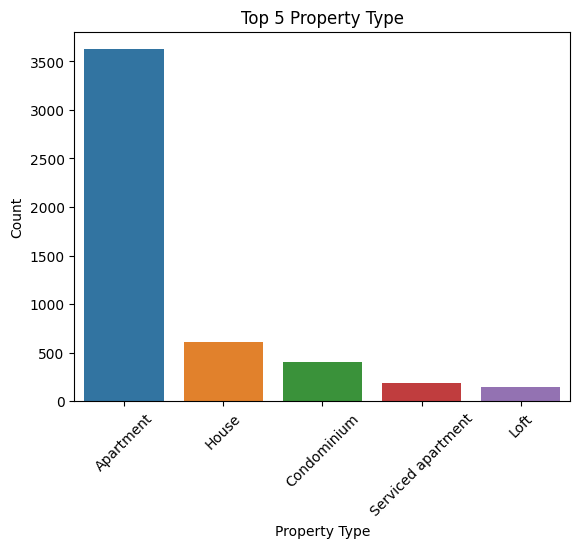

In [197]:
sns.barplot(x=types.index, y=types.values, hue = types.index)
plt.title('Top 5 Property Type')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Apartments are the most common property types

##### **How many properties offer entire homes/apartments versus private rooms or shared rooms?**

In [219]:
room_types = property_df['room_type'].value_counts()
room_types

room_type
Entire home/apt    3489
Private room       1983
Shared room          83
Name: count, dtype: int64

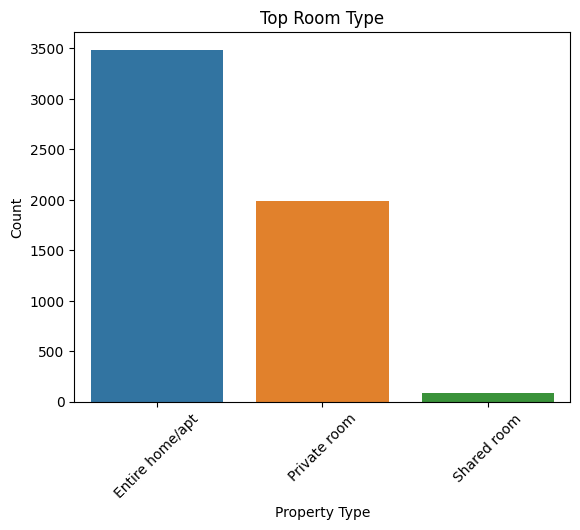

In [217]:
sns.barplot(x=room_types.index, y=room_types.values, hue = room_types.index)
plt.title('Top Room Type')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

We can see that **3489** properties offer Entire home and **2066** properties offer private/shared room

##### **Is there a significant difference in price between property types?**

In [221]:
avg_price_property_type = property_df.groupby('property_type')['price'].mean().sort_values(ascending=False)

Exception ignored in: <function ZipFile.__del__ at 0x0000028956857240>
Traceback (most recent call last):
  File "c:\Users\nilan\AppData\Local\Programs\Python\Python312\Lib\zipfile\__init__.py", line 1929, in __del__
    self.close()
  File "c:\Users\nilan\AppData\Local\Programs\Python\Python312\Lib\zipfile\__init__.py", line 1946, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


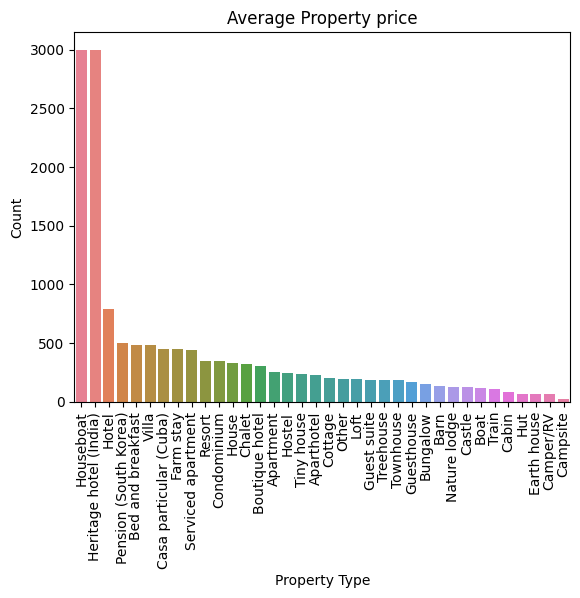

In [210]:
sns.barplot(x=avg_price_property_type.index, y=avg_price_property_type.values, hue = avg_price_property_type.index)
plt.title('Average Property price')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

We can see that the Average price for HouseBoat and Heritage Hotel is much higher compared to other property types

In [222]:
avg_price_room_type = property_df.groupby('room_type')['price'].mean().sort_values(ascending=False)

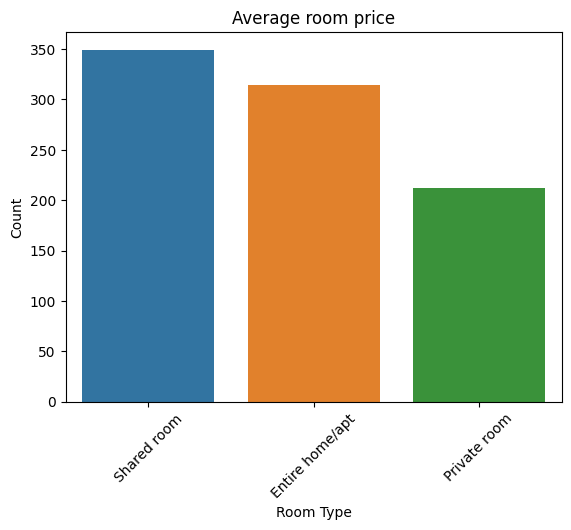

In [225]:
sns.barplot(x=avg_price_room_type.index, y=avg_price_room_type.values, hue = avg_price_room_type.index)
plt.title('Average room price')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

We can see that the average price of Shared room is the highest.

##### **How many properties have 1, 2, 3 bedrooms?**

In [232]:
bedrooms = property_df['total_bedrooms'].value_counts()
bedrooms

total_bedrooms
1.0     3308
2.0     1090
0.0      496
3.0      427
4.0      161
5.0       36
6.0       16
7.0        7
8.0        3
9.0        2
10.0       2
20.0       1
15.0       1
Name: count, dtype: int64

We can see :<br>
There are **3308** properties with 1 bedrooms.<br>
There are **1090** properties with 2 bedrooms.<br>
There are **427** properties with 3 bedrooms.<br>

##### **What is the average number of beds per property?**

In [238]:
average_beds_per_property = property_df['total_beds'].mean()
print(f"Average beds per property is {round(average_beds_per_property,2)}")

Average beds per property is 2.07


##### **What are the most common minimum and maximum stay requirements?**

In [243]:
# Count occurrences of each minimum nights requirement
min_nights_counts = property_df['min_nights'].value_counts().sort_index()

# Count occurrences of each maximum nights requirement
max_nights_counts = property_df['max_nights'].value_counts().sort_index()

# Find the most common minimum and maximum stay requirements
most_common_min_nights = min_nights_counts.idxmax()
most_common_min_nights_count = min_nights_counts.max()

most_common_max_nights = max_nights_counts.idxmax()
most_common_max_nights_count = max_nights_counts.max()

# Print the results
print(f"Most Common Minimum Stay Requirement: {most_common_min_nights} nights (Count: {most_common_min_nights_count})")
print(f"Most Common Maximum Stay Requirement: {most_common_max_nights} nights (Count: {most_common_max_nights_count})")

Most Common Minimum Stay Requirement: 1 nights (Count: 1862)
Most Common Maximum Stay Requirement: 1125 nights (Count: 3160)


##### **How do these security vary across different property types?**

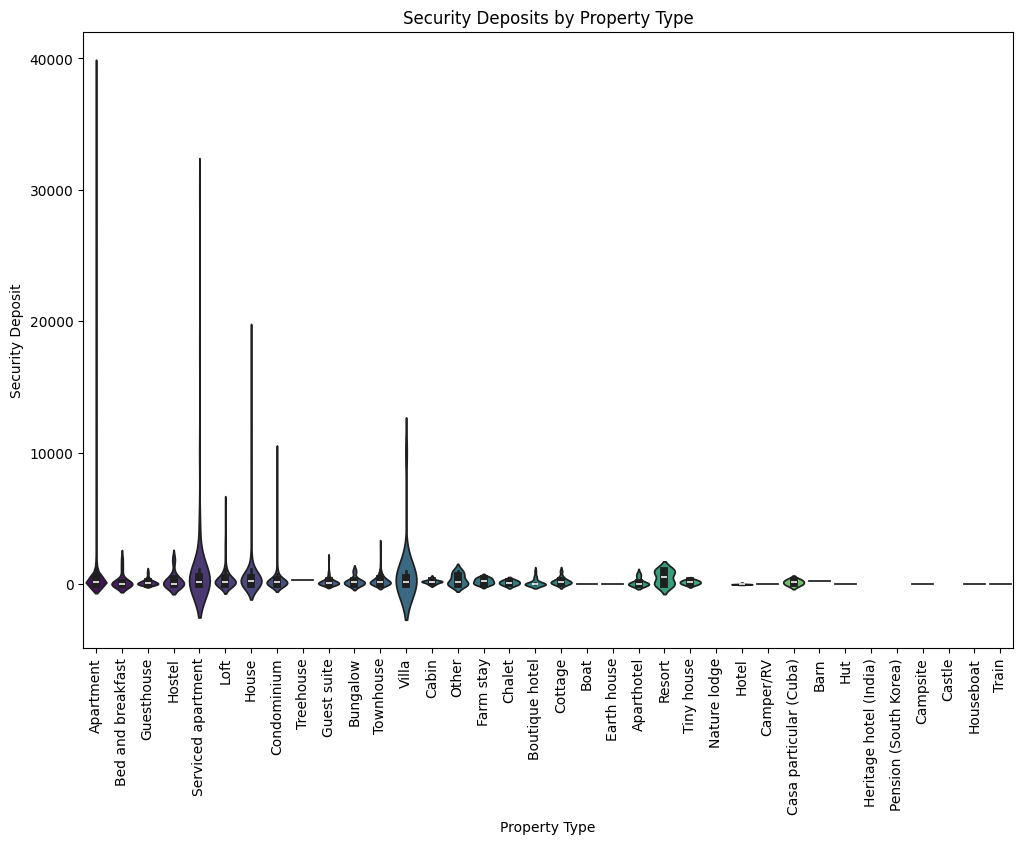

In [261]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='property_type', y='deposit', data=property_df, hue = 'property_type', palette='viridis')
plt.xlabel('Property Type')
plt.ylabel('Security Deposit')
plt.title('Security Deposits by Property Type')
plt.xticks(rotation=90)
plt.show()

##### **Is there a linear relationship between price and the number of bedrooms or beds?**

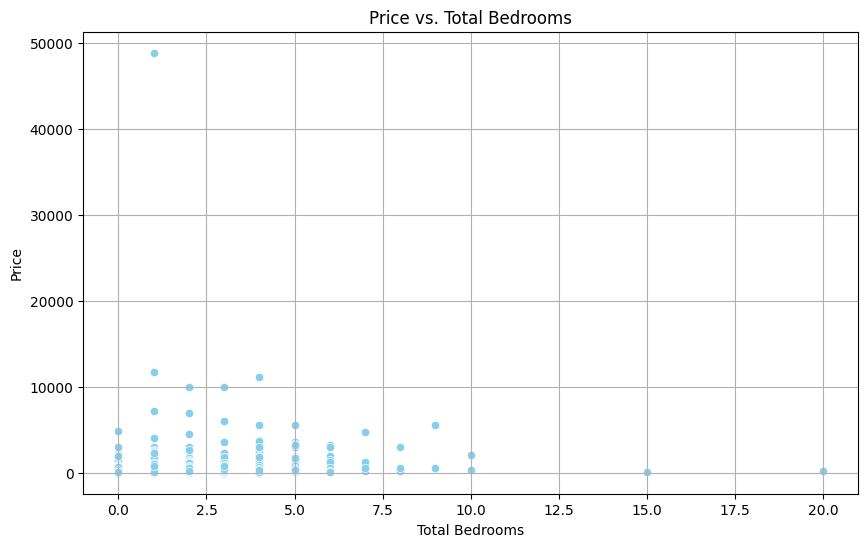

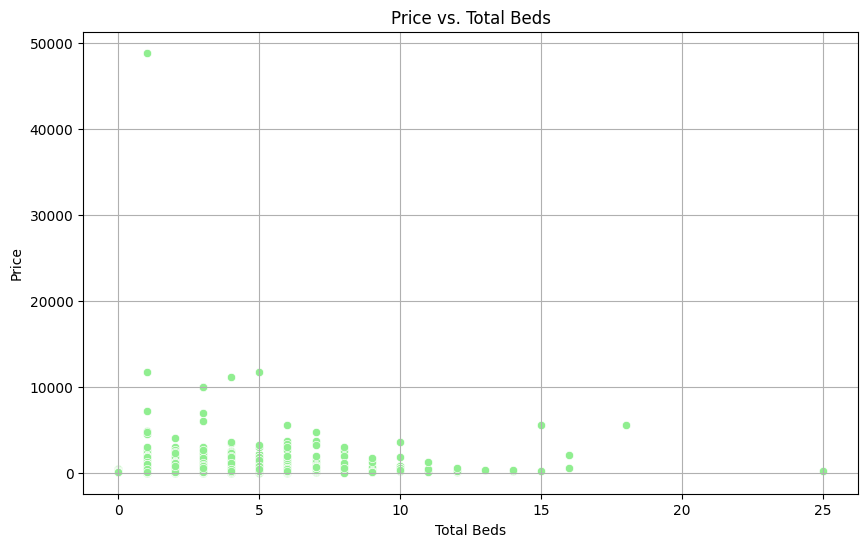

Correlation between Price and Total Bedrooms: 0.14
Correlation between Price and Total Beds: 0.14


In [264]:
# Scatter plot and correlation for price vs. number of bedrooms
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bedrooms', y='price', data=property_df, color='skyblue')
plt.xlabel('Total Bedrooms')
plt.ylabel('Price')
plt.title('Price vs. Total Bedrooms')
plt.grid(True)
plt.show()

# Scatter plot and correlation for price vs. number of beds
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_beds', y='price', data=property_df, color='lightgreen')
plt.xlabel('Total Beds')
plt.ylabel('Price')
plt.title('Price vs. Total Beds')
plt.grid(True)
plt.show()

# Calculate correlation coefficients
corr_bedrooms_price = property_df['total_bedrooms'].corr(property_df['price'])
corr_beds_price = property_df['total_beds'].corr(property_df['price'])

print(f"Correlation between Price and Total Bedrooms: {corr_bedrooms_price:.2f}")
print(f"Correlation between Price and Total Beds: {corr_beds_price:.2f}")

- Since the correlation coefficients are the same, it suggests that the increase in the number of bedrooms and beds both contribute similarly to the increase in property price in your dataset.
- The scatter plots visually confirm this positive linear relationship between price and both the number of bedrooms and beds.

##### **Which cancellation policy is most frequently used by hosts?**

In [265]:
property_df['cancellation_policy'].value_counts()

cancellation_policy
strict_14_with_grace_period    2420
flexible                       1682
moderate                       1336
super_strict_60                  79
super_strict_30                  38
Name: count, dtype: int64

**strict_14_with_grace_period** is the most common cancellation policy.

##### **What is the distribution of host response times?<br>How quickly do hosts typically respond to booking inquiries?**

In [268]:
host_df['host_response_time'].value_counts()

host_response_time
within an hour        14614
within a few hours     3749
within a day           2785
a few days or more      578
Name: count, dtype: int64

In [273]:
response_time_counts = host_df['host_response_time'].value_counts(normalize=True) * 100
round(response_time_counts,2)

host_response_time
within an hour        67.27
within a few hours    17.26
within a day          12.82
a few days or more     2.66
Name: proportion, dtype: float64

- Hosts generally respond quickly to booking inquiries, with the majority responding within an hour or a few hours.
- Understanding these response times can be important for guests making booking decisions, as quick response times can indicate attentive and responsive hosts.

##### **What proportion of hosts are superhosts?<br>How common is the superhost status among all hosts?**

In [285]:
total_superhosts = host_df[host_df['host_is_superhost'] == 'Yes'].shape[0]
total_hosts = host_df['host_is_superhost'].shape[0]
percent_of_superhosts = (total_superhosts/total_hosts) * 100
print(f"{round(percent_of_superhosts,2)}% of hosts are superhosts.")

22.13% of hosts are superhosts.


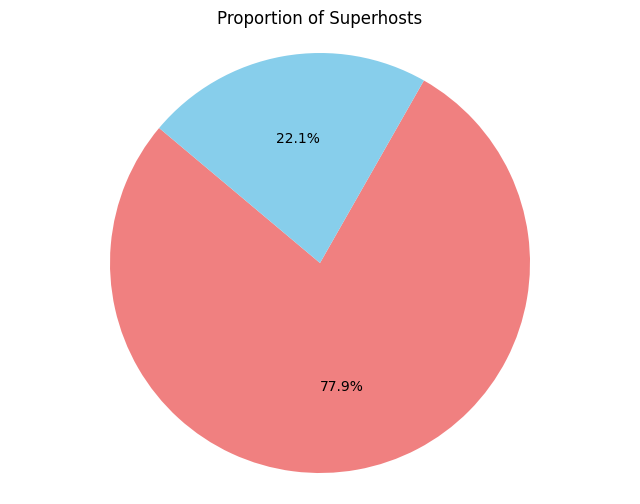

In [291]:
host_df['host_is_superhost'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(host_df['host_is_superhost'].value_counts(), autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], startangle=140)
plt.title('Proportion of Superhosts')
plt.axis('equal')
plt.show()

This shows that it is not at all common that a host is superhost.

##### **What is the average number of listings per host?<br>Do most hosts manage multiple properties, or just one?**

In [294]:
print(f"Average listings per host is {round(host_df['host_id'].value_counts().mean(),2)}")

Average listings per host is 5.41


Most hosts manage almost 6 listing in this dataset, as the average number of listings per host is 5.41.

##### **What are the most common host verification methods?**

In [298]:
ver_type = host_df['host_verifications'].value_counts().head(5)

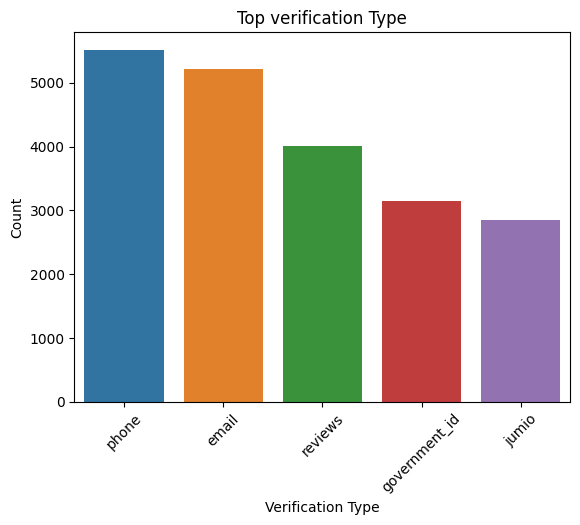

In [299]:
sns.barplot(x=ver_type.index, y=ver_type.values, hue = ver_type.index)
plt.title('Top verification Type')
plt.xlabel('Verification Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

W can see the most common type of verification is by phone

##### **Is there a correlation between host response rate and the number of listings they manage?**

In [301]:
corr_response_listings = host_df['host_response_rate'].corr(host_df['host_listings_count'])
corr_response_listings

0.016982257111441364

It suggests that there is a very weak tendency for hosts with more listings to have a slightly higher response rate.

##### **What is the geographic distribution of hosts?<br>Where are the majority of hosts located?**

In [308]:
host_loc = host_df['host_location'].value_counts().head(5)
host_loc

host_location
New York, New York, United States     2667
Barcelona, Catalonia, Spain           2270
Montreal, Quebec, Canada              1834
Porto, Porto District, Portugal       1305
Sydney, New South Wales, Australia    1294
Name: count, dtype: int64

The most common location is **New York**.

##### **How many hosts have verified profile pictures and identities?<br>What percentage of hosts have taken steps to verify their profile?**

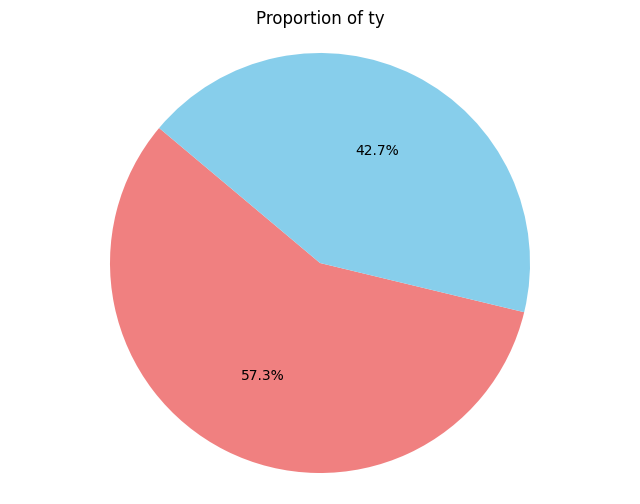

In [313]:
host_df['host_identity_verified'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(host_df['host_identity_verified'].value_counts(), autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], startangle=140)
plt.title('Proportion of ty')
plt.axis('equal')
plt.show()

So, 57.3% hosts are not verified.

##### **How does the availability of properties vary by country?**

In [334]:
df = pd.merge(address_df,availability_df,on='_id')
availability_by_country = df.groupby('country')[['availability_30', 'availability_60', 'availability_90', 'availability_365']].mean()

print(availability_by_country)

               availability_30  availability_60  availability_90  \
country                                                            
Australia             7.121311        17.536066        29.842623   
Brazil               13.886139        32.004950        51.245875   
Canada                9.229584        20.286595        31.741140   
China                19.315789        43.263158        67.894737   
Hong Kong            10.821667        25.141667        41.835000   
Portugal             16.758559        36.464865        56.070270   
Spain                 9.780411        22.278041        37.443918   
Turkey               22.059002        45.697428        70.394856   
United States         8.148118        19.006547        32.666939   

               availability_365  
country                          
Australia            101.862295  
Brazil               194.511551  
Canada               109.627119  
China                235.421053  
Hong Kong            141.206667  
Portugal     

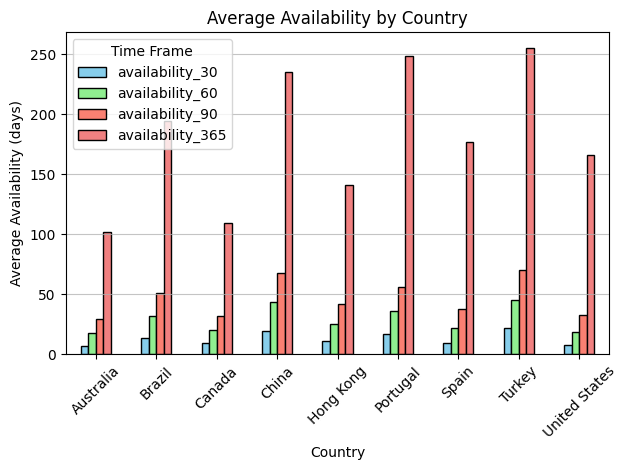

In [329]:
availability_by_country.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'], edgecolor='black')
plt.title('Average Availability by Country')
plt.xlabel('Country')
plt.ylabel('Average Availability (days)')
plt.grid(axis='y', alpha=0.75)
plt.legend(title='Time Frame')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **What is the distribution of review scores across different categories (accuracy, cleanliness, check-in, communication, location, value, overall rating)?**

Summary Statistics:
          latitude    longitude  availability_30  availability_60  \
count  5555.000000  5555.000000      5555.000000      5555.000000   
mean     -6.623240    22.061230        11.816202        26.451305   
std      90.525974    28.092112        11.686113        23.476011   
min    -159.678690   -34.088290         0.000000         0.000000   
25%     -73.599530    20.724390         0.000000         0.000000   
50%      -8.611420    40.727130         8.000000        23.000000   
75%      29.019605    41.162755        24.000000        52.000000   
max     151.338980    45.665630        30.000000        60.000000   

       availability_90  availability_365  
count      5555.000000       5555.000000  
mean         42.758056        173.105671  
std          35.226897        139.841893  
min           0.000000          0.000000  
25%           0.000000         17.000000  
50%          43.000000        171.000000  
75%          80.000000        317.000000  
max          9

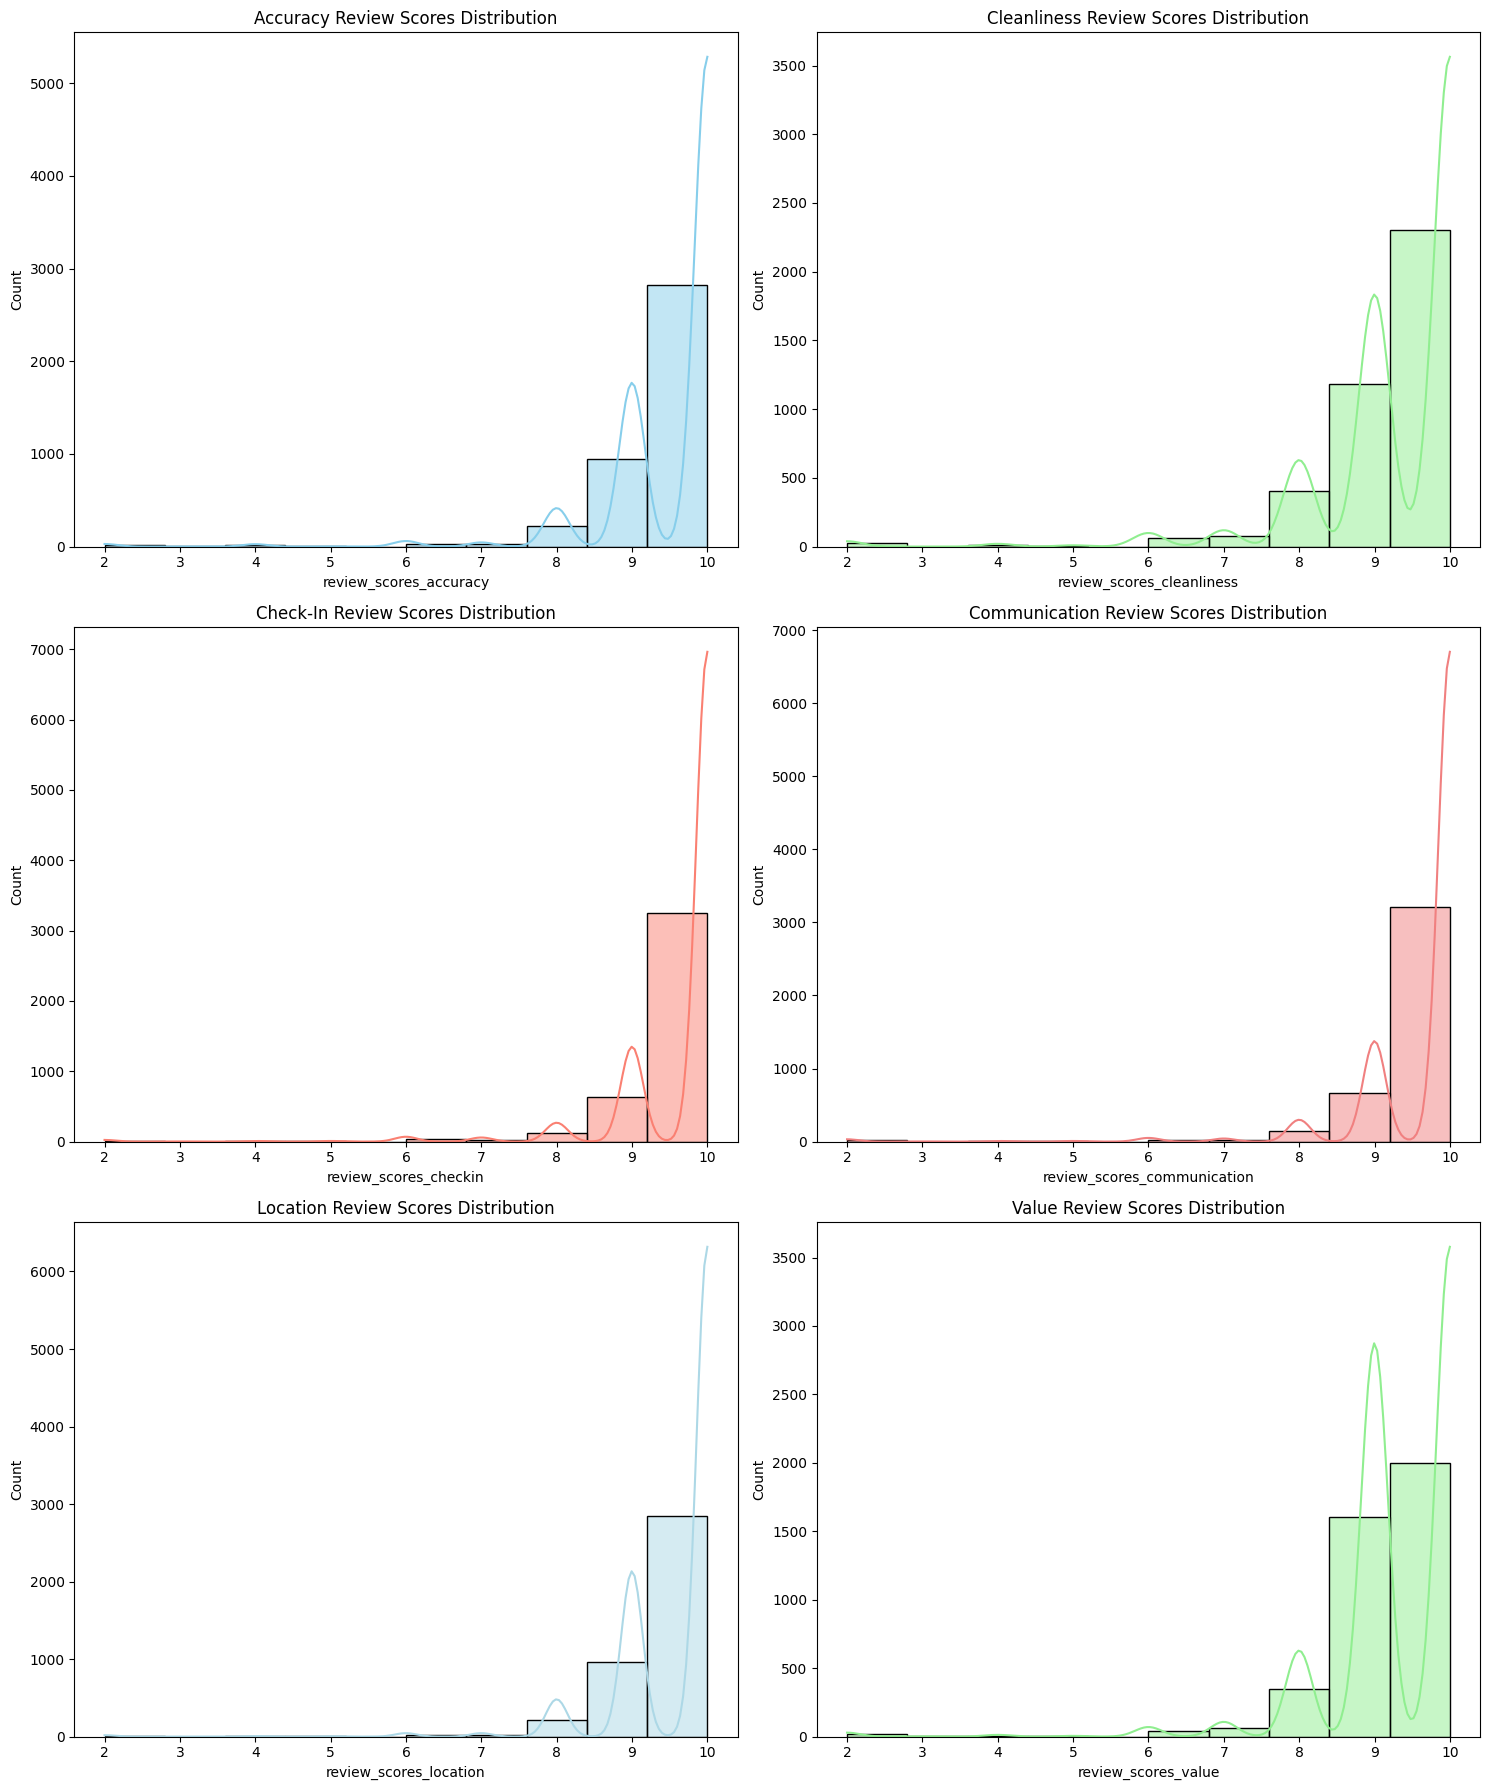

In [333]:
summary_stats = df.describe()

print("Summary Statistics:")
print(summary_stats)

fig, axes = plt.subplots(3, 2, figsize=(15, 18))

sns.histplot(review_scores_df['review_scores_accuracy'], bins=10, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Accuracy Review Scores Distribution')

sns.histplot(review_scores_df['review_scores_cleanliness'], bins=10, kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Cleanliness Review Scores Distribution')

sns.histplot(review_scores_df['review_scores_checkin'], bins=10, kde=True, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Check-In Review Scores Distribution')

sns.histplot(review_scores_df['review_scores_communication'], bins=10, kde=True, ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Communication Review Scores Distribution')

sns.histplot(review_scores_df['review_scores_location'], bins=10, kde=True, ax=axes[2, 0], color='lightblue')
axes[2, 0].set_title('Location Review Scores Distribution')

sns.histplot(review_scores_df['review_scores_value'], bins=10, kde=True, ax=axes[2, 1], color='lightgreen')
axes[2, 1].set_title('Value Review Scores Distribution')

plt.tight_layout()
plt.show()

How do review scores correlate with property price?

How do review scores vary between superhosts and non-superhosts?

Are hosts who respond quickly rated higher in communication?

What common features do the top-rated properties have in terms of amenities, location, and host attributes?

##### **How do review scores vary by property type (e.g., room type, property type)?**

##### **What are the most common amenities provided across all properties?**

In [348]:
amenities = amenity_df['amenities'].value_counts().head(5)

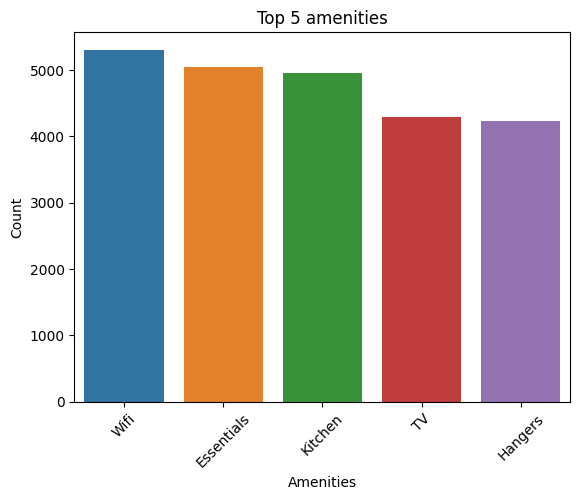

In [350]:
sns.barplot(x=amenities.index, y=amenities.values, hue = amenities.index)
plt.title('Top 5 amenities')
plt.xlabel('Amenities')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

We can see that the most common amenities are Wifi, Essentials and kitchen are the most common amennities.